# Stock Prediction w/scikit learn

#### https://enlight.nyc/projects/stock-market-prediction

In [16]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

# import quandl

from sklearn.linear_model import LinearRegression
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split

In [3]:
# df = pd.read_csv('data/MUFG-orig.csv')
df = pd.read_csv('data/IBM.csv')

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1962-01-02,7.374124,7.374124,7.291268,7.291268,1.591517,407940
1,1962-01-03,7.291268,7.355003,7.291268,7.355003,1.605428,305955
2,1962-01-04,7.355003,7.355003,7.278521,7.281708,1.589431,274575
3,1962-01-05,7.272148,7.272148,7.125558,7.138305,1.558129,384405
4,1962-01-08,7.131931,7.131931,6.947100,7.004461,1.528913,572685


In [5]:
df = df[['Adj Close']]

In [6]:
forecast_out = int(30) # predicting 30 days into future
df['Prediction'] = df[['Adj Close']].shift(-forecast_out) #  label column with data shifted 30 units up

In [35]:
X = np.array(df.drop(['Prediction'], 1))
X_raw = X
X = preprocessing.scale(X)

/tmp/ipykernel_241/1372015310.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['Prediction'], 1))


### Set a new input variable to these days and remove them from the X array.

In [36]:
X_forecast = X[-forecast_out:] # set X_forecast equal to last 30
X = X[:-forecast_out] # remove last 30 from X

### To define our y, or output, we will set it equal to our array of the Prediction values and remove the last 30 days where we don’t have any pricing data.

In [37]:
y = np.array(df['Prediction'])
y = y[:-forecast_out]

## Linear regression model

### Split the data into training and test sets.

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [39]:
# Training
clf = LinearRegression()
clf.fit(X_train,y_train)
# Testing
confidence = clf.score(X_test, y_test)
print("confidence: ", confidence)

confidence:  0.989833955026448


In [49]:
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType
initial_type = [('float_input', FloatTensorType([1]))]
onx = convert_sklearn(clf, initial_types=initial_type)
with open("stocks.onnx", "wb") as f:
    f.write(onx.SerializeToString())

In [40]:
forecast_prediction = clf.predict(X_forecast)
print(forecast_prediction)

[124.22041658 124.18105232 125.28330643 124.73217987 124.41724885
 123.50198694 121.81908408 120.95302551 122.01591635 121.76987876
 121.20125476 122.04919142 120.93191385 122.86720086 123.38594418
 123.48569955 125.7302404  126.16917582 127.27648264 127.51589833
 128.19424147 125.70031418 126.77769578 128.90252479 129.49109028
 128.60324968 129.83027632 132.42395898 132.64342619 132.69330787]


In [44]:
X_forecast_raw = X_raw[-forecast_out:]
X_raw = X_raw[:-forecast_out]
X_raw

array([[  1.591517],
       [  1.605428],
       [  1.589431],
       ...,
       [126.327454],
       [124.462875],
       [123.762421]])

In [42]:
clf.predict(X_forecast)

array([124.22041658, 124.18105232, 125.28330643, 124.73217987,
       124.41724885, 123.50198694, 121.81908408, 120.95302551,
       122.01591635, 121.76987876, 121.20125476, 122.04919142,
       120.93191385, 122.86720086, 123.38594418, 123.48569955,
       125.7302404 , 126.16917582, 127.27648264, 127.51589833,
       128.19424147, 125.70031418, 126.77769578, 128.90252479,
       129.49109028, 128.60324968, 129.83027632, 132.42395898,
       132.64342619, 132.69330787])

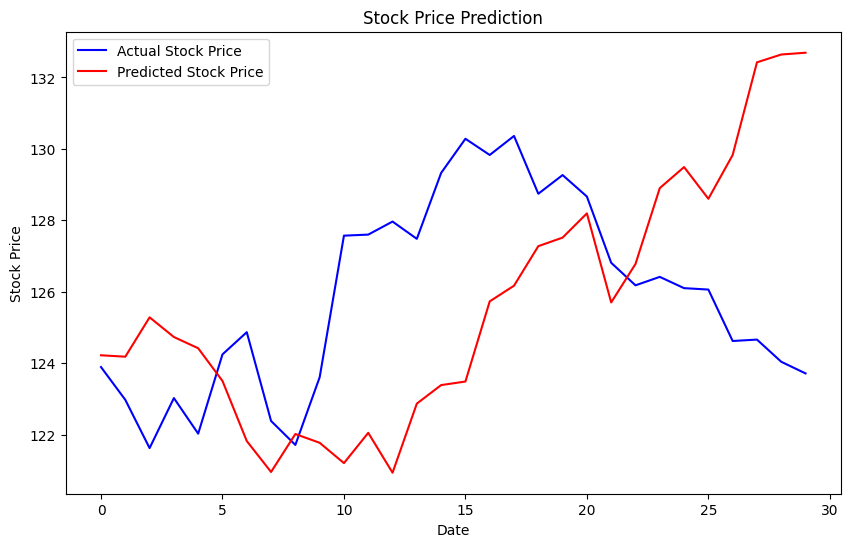

In [45]:
plt.figure(figsize=(10,6))  
plt.plot(X_forecast_raw, color='blue', label='Actual Stock Price')  
plt.plot(forecast_prediction , color='red', label='Predicted Stock Price')  
plt.title('Stock Price Prediction')  
plt.xlabel('Date')  
plt.ylabel('Stock Price')  
plt.legend()  
plt.show()  